In [1]:
# imports
import pandas as pd
from vega_datasets import data


In [2]:
df = data.sf_temps()


1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

<AxesSubplot:xlabel='date'>

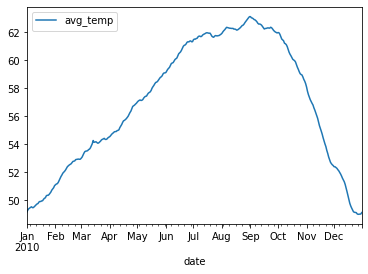

In [5]:
# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
df_day = df.set_index('date').resample('D').mean()
# rename temp column to avg_temp
df_day.rename(columns={'temp': 'avg_temp'}, inplace=True)
# Visualize the average temperature over time.
df_day.plot()


In [6]:
df_day

,avg_temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

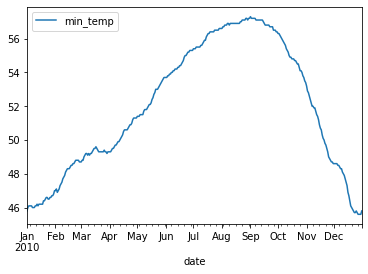

In [7]:
# 2. Write the code necessary to visualize the minimum temperature over time.
df_min = df.set_index('date').resample('D').min()
# rename temp column to min_temp
df_min.rename(columns={'temp': 'min_temp'}, inplace=True)
# Visualize the minimum temperature over time.
df_min.plot()

In [8]:
df_min

,min_temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:xlabel='date'>

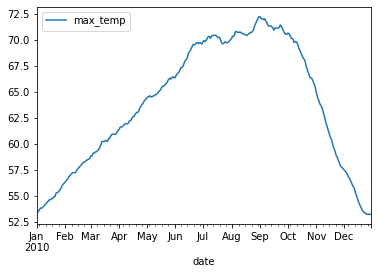

In [9]:
# 3. Write the code necessary to visualize the maximum temperature over time.
df_max = df.set_index('date').resample('D').max()
# rename temp column to max_temp
df_max.rename(columns={'temp': 'max_temp'}, inplace=True)
# Visualize the maximum temperature over time.
df_max.plot()


In [10]:
# combine the dataframes
vegas_temps = pd.concat([df_day, df_min, df_max], axis=1)
vegas_temps.head()

,avg_temp,min_temp,max_temp
date,,,
2010-01-01,49.170833,45.8,53.3
2010-01-02,49.304167,46.0,53.4
2010-01-03,49.391667,46.1,53.5
2010-01-04,49.445833,46.1,53.6
2010-01-05,49.491667,46.1,53.8


In [11]:
# 4. Which month is the coldest, on average?
avg_M = vegas_temps.resample('M').mean()

# find the month with the lowest average temperature
print(avg_M.idxmin())

print(avg_M.min())

avg_temp   2010-01-31
min_temp   2010-01-31
max_temp   2010-01-31
dtype: datetime64[ns]
avg_temp    49.984140
min_temp    46.309677
max_temp    54.651613
dtype: float64


In [12]:
# 5. Which month has the highest average temperature?
print(avg_M.idxmax())
print(avg_M.max())

avg_temp   2010-09-30
min_temp   2010-08-31
max_temp   2010-09-30
dtype: datetime64[ns]
avg_temp    62.487083
min_temp    56.941935
max_temp    71.306667
dtype: float64


In [13]:
# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max']))
df_day_min_max = df.set_index('date').resample('D').agg(['min', 'max'])
# calculate the change in temperature for the day using agg min and max
df_day_min_max.columns = ['min', 'max']
df_day_min_max['delta_temp'] = df_day_min_max['max'] - df_day_min_max['min']
# Which month has the highest daily delta_temp?
print(df_day_min_max.delta_temp.idxmax())
print(df_day_min_max.delta_temp.max())

2010-08-31 00:00:00
15.0


<AxesSubplot:xlabel='date'>

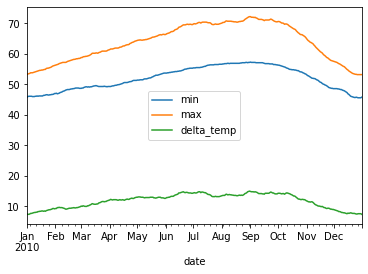

In [14]:
# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
df_day_min_max.plot()
